In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [5]:
# Load the diabetes dataset
df = pd.read_csv('diabetes.csv')



In [7]:

# Display basic dataset info
display(df.head())
print(df.info())
print(df.describe().T)


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 7 non-null      int64  
 1   glucose                     7 non-null      int64  
 2   blood_pressure              7 non-null      int64  
 3   skin_thickness              7 non-null      int64  
 4   insulin                     7 non-null      int64  
 5   bmi                         7 non-null      float64
 6   diabetes_pedigree_function  7 non-null      float64
 7   age                         7 non-null      int64  
 8   diabetes                    7 non-null      int64  
dtypes: float64(2), int64(7)
memory usage: 636.0 bytes
None
                            count        mean        std     min     25%  \
pregnancies                   7.0    3.428571   3.408672   0.000   1.000   
glucose                       7.0  130.285714  36.940106  85.

In [9]:

# Checking for missing values
print(df.isnull().sum())



pregnancies                   0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
diabetes                      0
dtype: int64


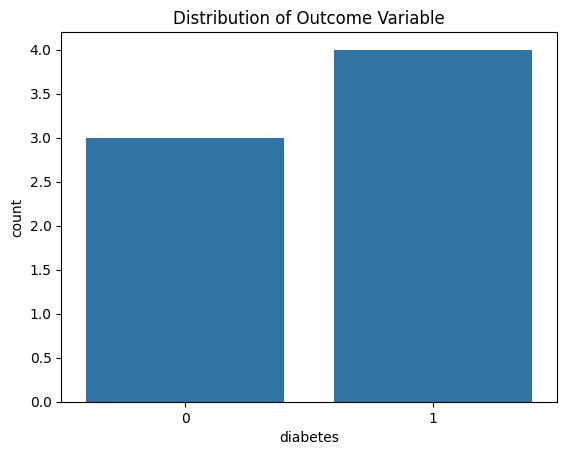

In [13]:
# Visualizing the distribution of target variable
sns.countplot(x=df['diabetes'])
plt.title('Distribution of Outcome Variable')
plt.show()



In [15]:
# Splitting data into features and target variable
X = df.drop(columns=['diabetes'])
y = df['diabetes']



In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
# Model Training
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [21]:

# Predictions
y_pred = model.predict(X_test)

# Accuracy Calculation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [23]:
# Predicting for a new instance
input_data = (5,116,74,0,0,25.6,0.201,30)  # Example input
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    print('The Person does not have Diabetes')
else:
    print('The Person has Diabetes')


[0]
The Person does not have Diabetes


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [25]:
import pickle

In [27]:
filename = 'diabetes_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [29]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [33]:
for column in X_train.columns:
  print(column)

pregnancies
glucose
blood_pressure
skin_thickness
insulin
bmi
diabetes_pedigree_function
age


In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 5 to 6
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 5 non-null      int64  
 1   glucose                     5 non-null      int64  
 2   blood_pressure              5 non-null      int64  
 3   skin_thickness              5 non-null      int64  
 4   insulin                     5 non-null      int64  
 5   bmi                         5 non-null      float64
 6   diabetes_pedigree_function  5 non-null      float64
 7   age                         5 non-null      int64  
dtypes: float64(2), int64(6)
memory usage: 360.0 bytes
